In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 16
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 14
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 12
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 12
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 10
#set pixel density of figures
plt.rcParams['figure.dpi'] = 300

In [31]:
# Code on page 530
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 5)
temperatures = pd.read_csv('US_temperatures.csv')
print(temperatures)

           Date  Albuquerque  ...  St Louis  Tampa
0      19610101        -0.55  ...     -0.55  15.00
1      19610102        -2.50  ...     -0.55  13.60
2      19610103        -2.50  ...      0.30  11.95
...         ...          ...  ...       ...    ...
20085  20151229        -2.15  ...      1.40  26.10
20086  20151230        -2.75  ...      0.60  25.55
20087  20151231        -0.75  ...     -0.25  25.55

[20088 rows x 22 columns]


In [32]:
temperatures.set_index('Date', drop = True, inplace = True)
temperatures['Max T'] = temperatures.max(axis = 'columns')
temperatures['Min T'] = temperatures.min(axis = 'columns')
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2)
print(temperatures.loc[20000704:20000704])

          Albuquerque  Baltimore  ...  Min T  Mean T
Date                              ...               
20000704        26.65      25.55  ...  15.25   24.42

[1 rows x 24 columns]


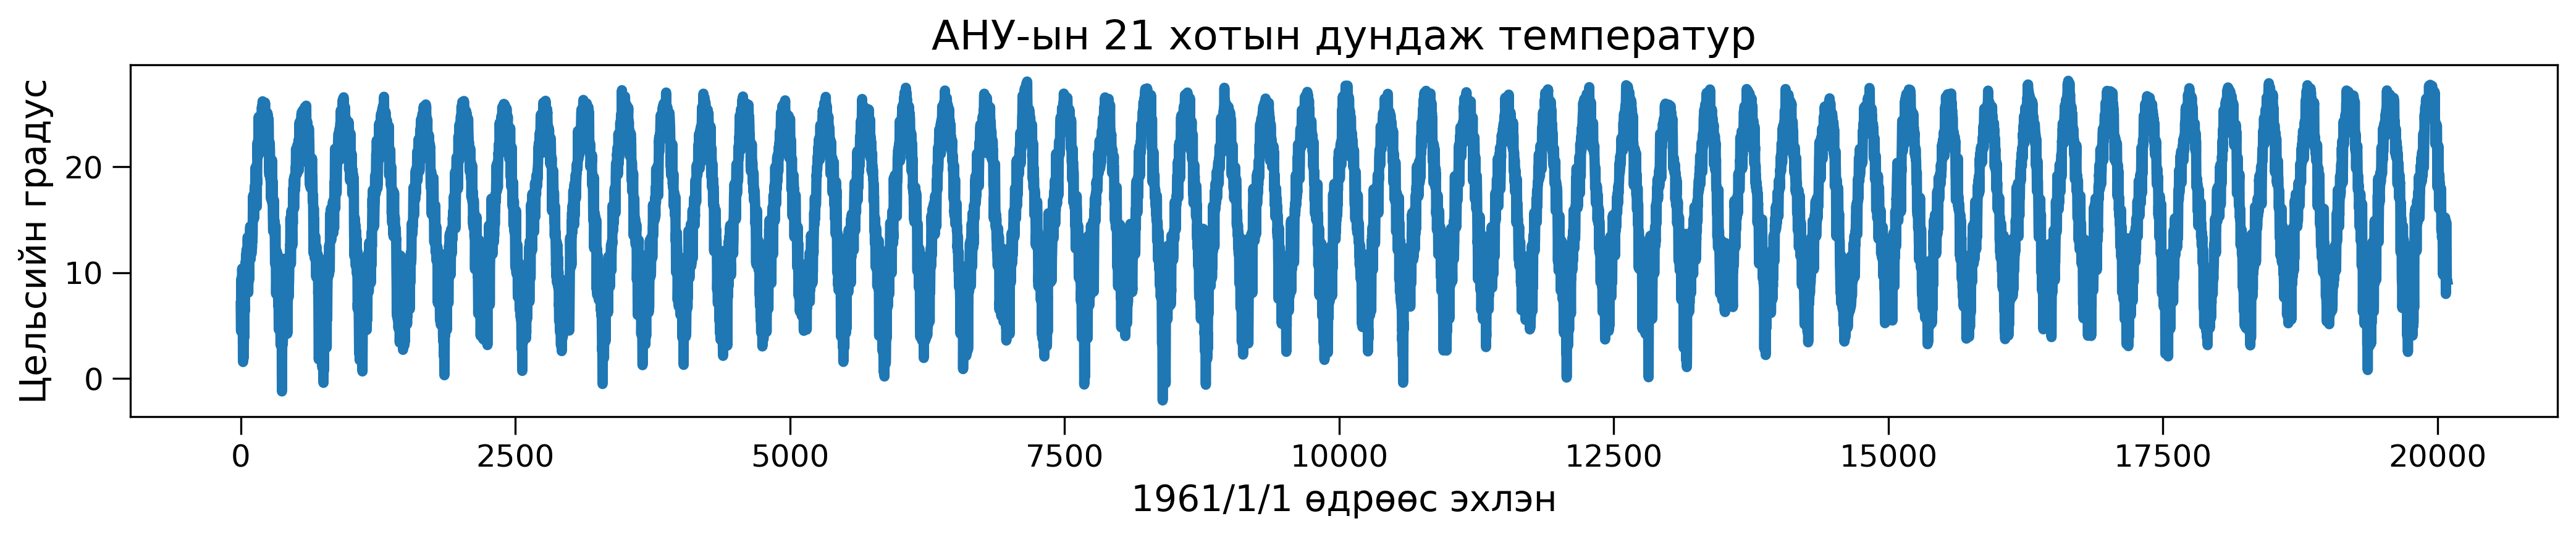

In [37]:
plt.figure(figsize = (14, 3)) #set aspect ratio for figure
plt.plot(list(temperatures['Mean T']))
plt.title('АНУ-ын 21 хотын дундаж температур')
plt.xlabel('1961/1/1 өдрөөс эхлэн')
plt.ylabel('Цельсийн градус')
plt.tight_layout()
plt.savefig('figure23-0a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

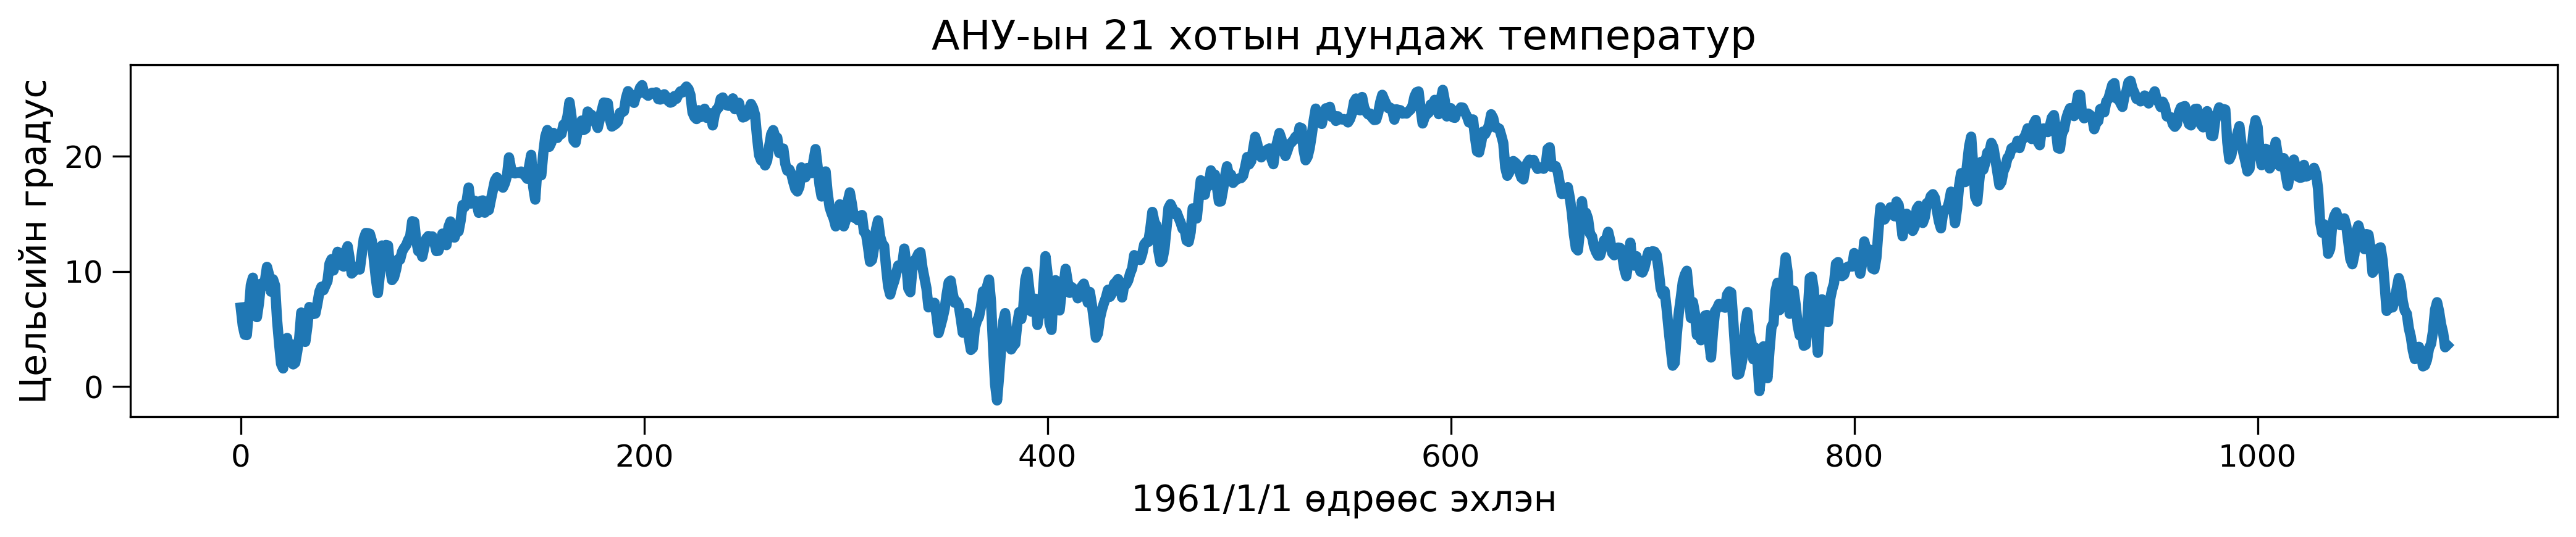

In [38]:
plt.figure(figsize = (14, 3)) #set aspect ratio for figure
plt.plot(list(temperatures['Mean T'])[0:3*365])
plt.title('АНУ-ын 21 хотын дундаж температур')
plt.xlabel('1961/1/1 өдрөөс эхлэн')
plt.ylabel('Цельсийн градус')
plt.tight_layout()
plt.savefig('figure23-0b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [14]:
# # Figure 23-3 from page 534
def get_dict(temperatures, labels):
    """temperatures a DataFrame. Its indices are ints
    representing dates of the form yyyymmdd
    labels a list of column labels
    returns a dict with strs representing years as keys,
    the values dicts with the columns as keys, and
    a list of the daily temperatures in that column for
    that year as values
    """
    year_dict = {}
    for index, row in temperatures.iterrows():
        year = str(index)[0:4]
        try:
            for col in labels:
                year_dict[year][col].append(row[col])
        except:
            year_dict[year] = {col:[] for col in labels}
            for col in labels:
                year_dict[year][col].append(row[col])
    return year_dict

In [15]:
temperatures = pd.read_csv('US_temperatures.csv')
temperatures.set_index('Date', drop = True, inplace = True)
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2)
temperatures['Max T'] = temperatures.max(axis = 'columns')
temperatures['Min T'] = temperatures.min(axis = 'columns')
yearly_dict = get_dict(temperatures, ['Max T', 'Min T', 'Mean T'])
years, mins, maxes, means = [], [], [], []
for y in yearly_dict:
    years.append(y)
    mins.append(min(yearly_dict[y]['Min T']))
    maxes.append(max(yearly_dict[y]['Max T']))
    means.append(round(np.mean(yearly_dict[y]['Mean T']), 2))
yearly_temps = pd.DataFrame({'Year': years, 'Min T': mins,
                              'Max T': maxes, 'Mean T': means})
print(yearly_temps)

    Year  Min T  Max T  Mean T
0   1961 -17.25  38.05   15.64
1   1962 -21.65  36.95   15.39
2   1963 -24.70  36.10   15.50
..   ...    ...    ...     ...
52  2013 -15.00  40.55   16.66
53  2014 -22.70  40.30   16.85
54  2015 -18.80  40.55   17.54

[55 rows x 4 columns]


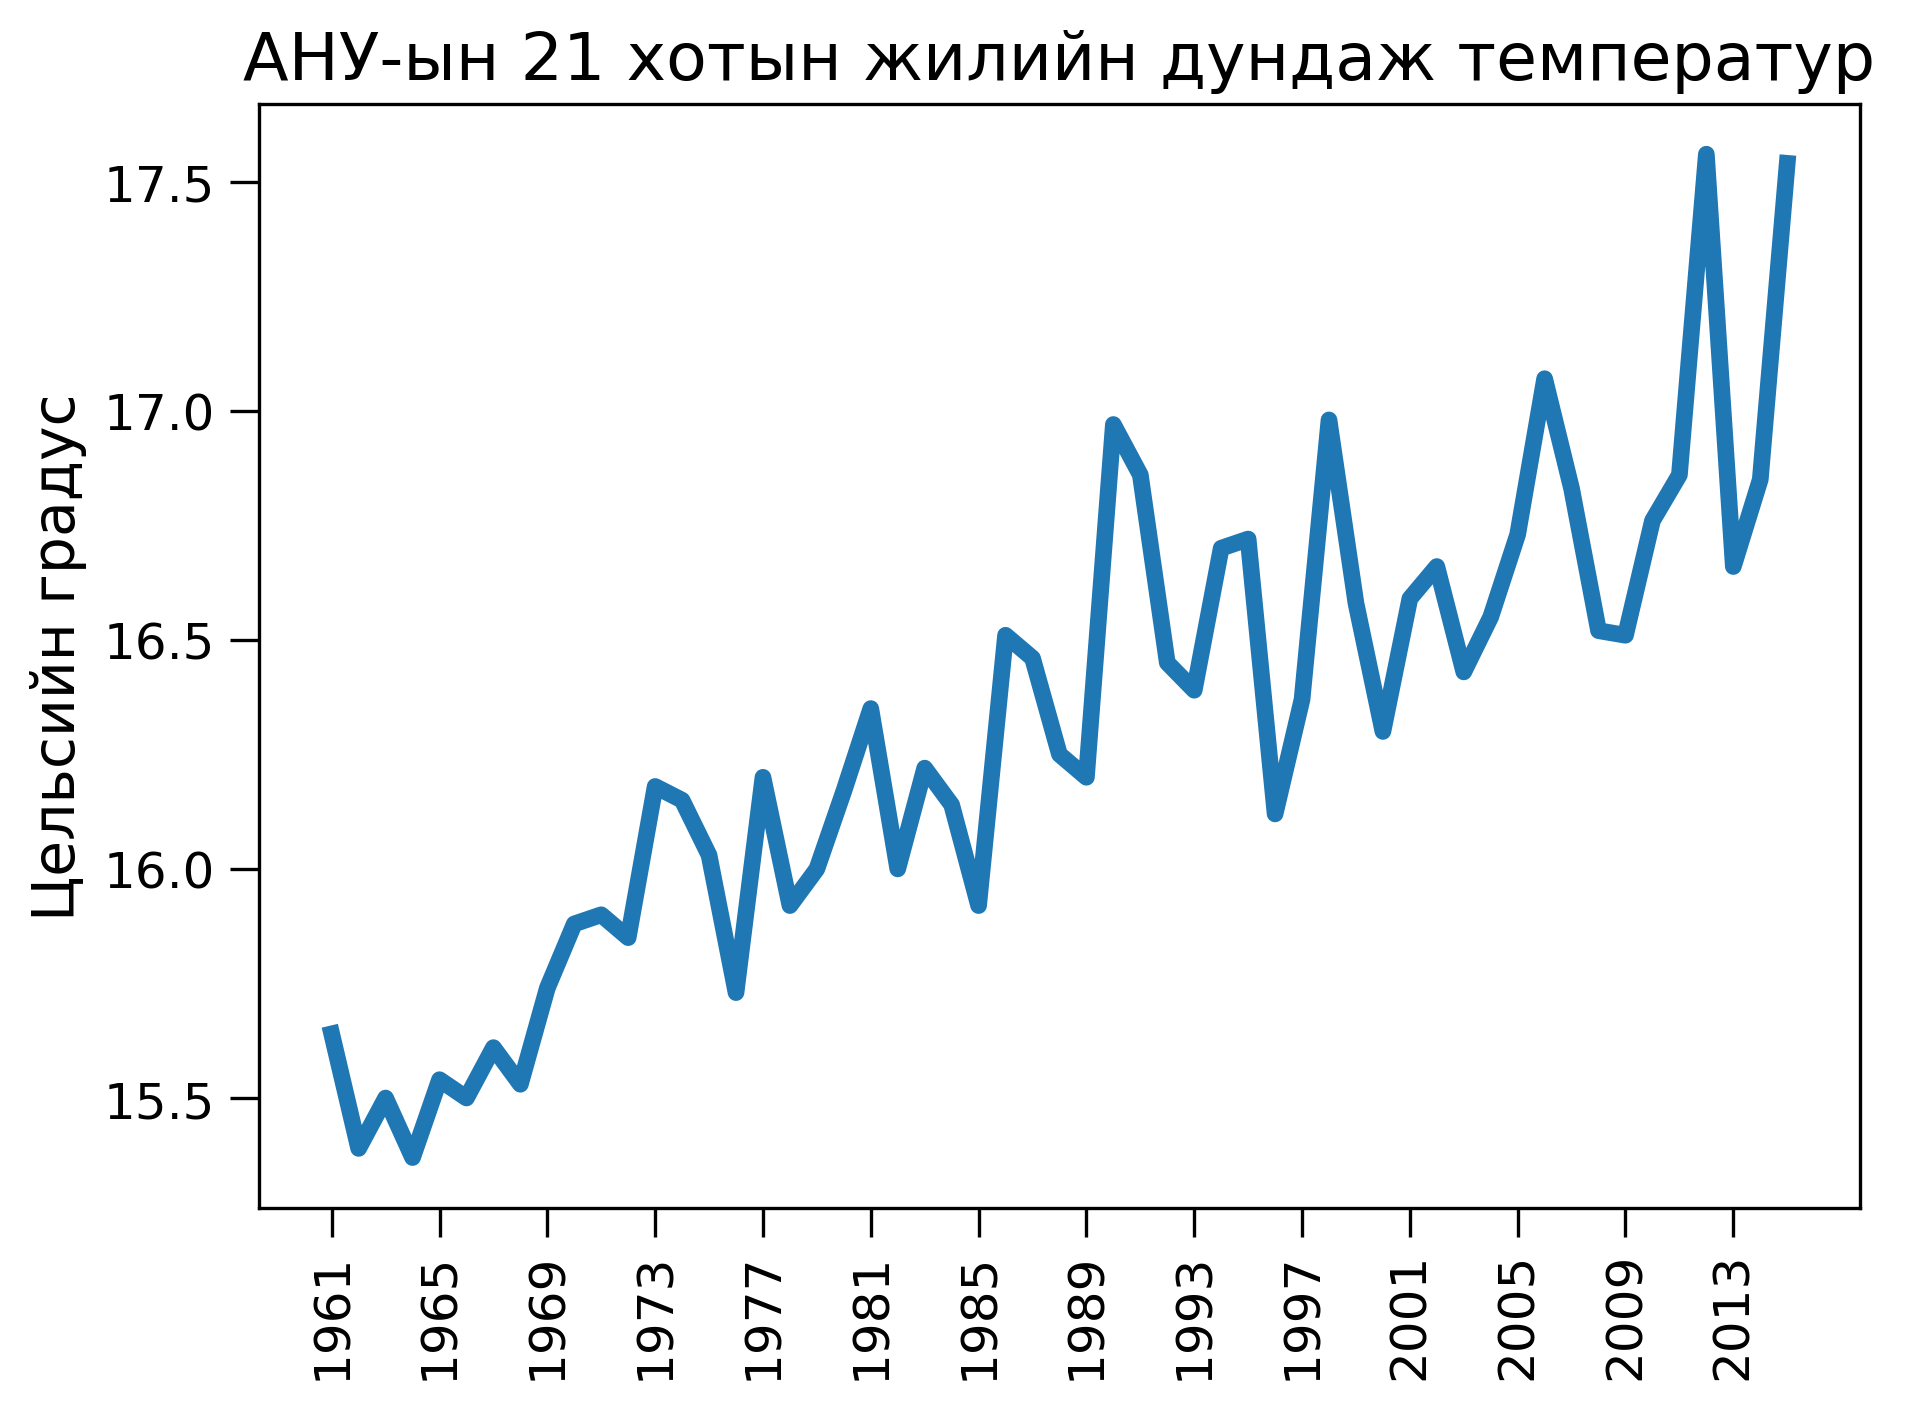

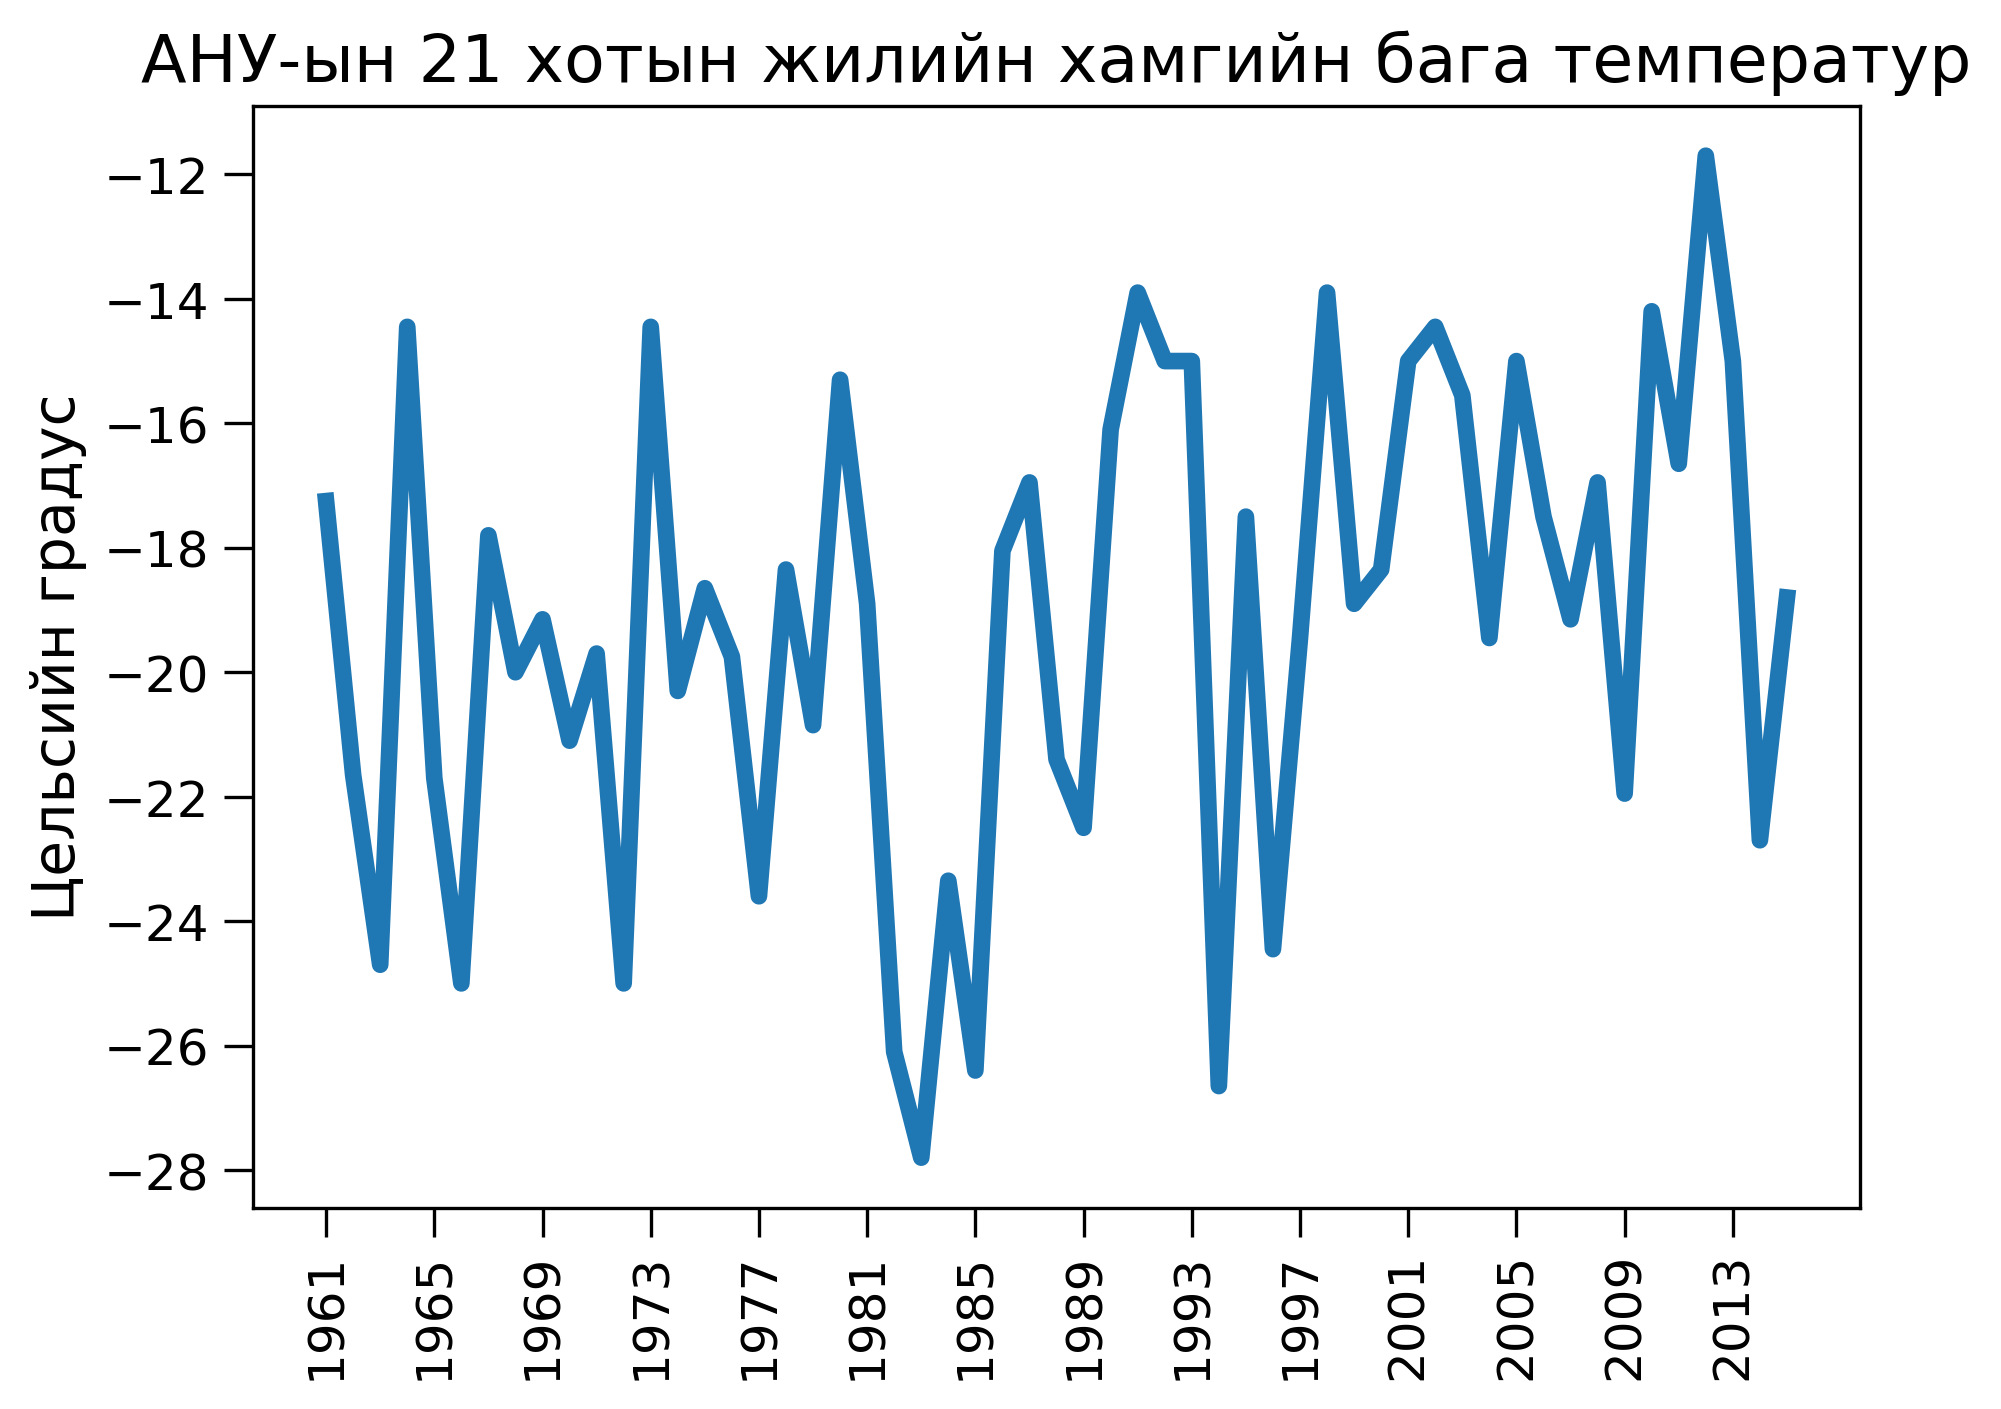

In [ ]:
# Figure 23-5 from page 536
plt.figure(0)
plt.plot(yearly_temps['Year'], yearly_temps['Mean T'])
plt.title('АНУ-ын 21 хотын жилийн дундаж температур')
plt.figure(1)
plt.plot(yearly_temps['Year'], yearly_temps['Min T'])
plt.title('АНУ-ын 21 хотын жилийн хамгийн бага температур')
for i in range(2):
    plt.figure(i)
    plt.xticks(range(0, len(yearly_temps), 4),
                rotation = 'vertical', size = 'large')
    plt.ylabel('Цельсийн градус')
    plt.tight_layout()
    plt.savefig(f'figure23-6-{i+1}.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

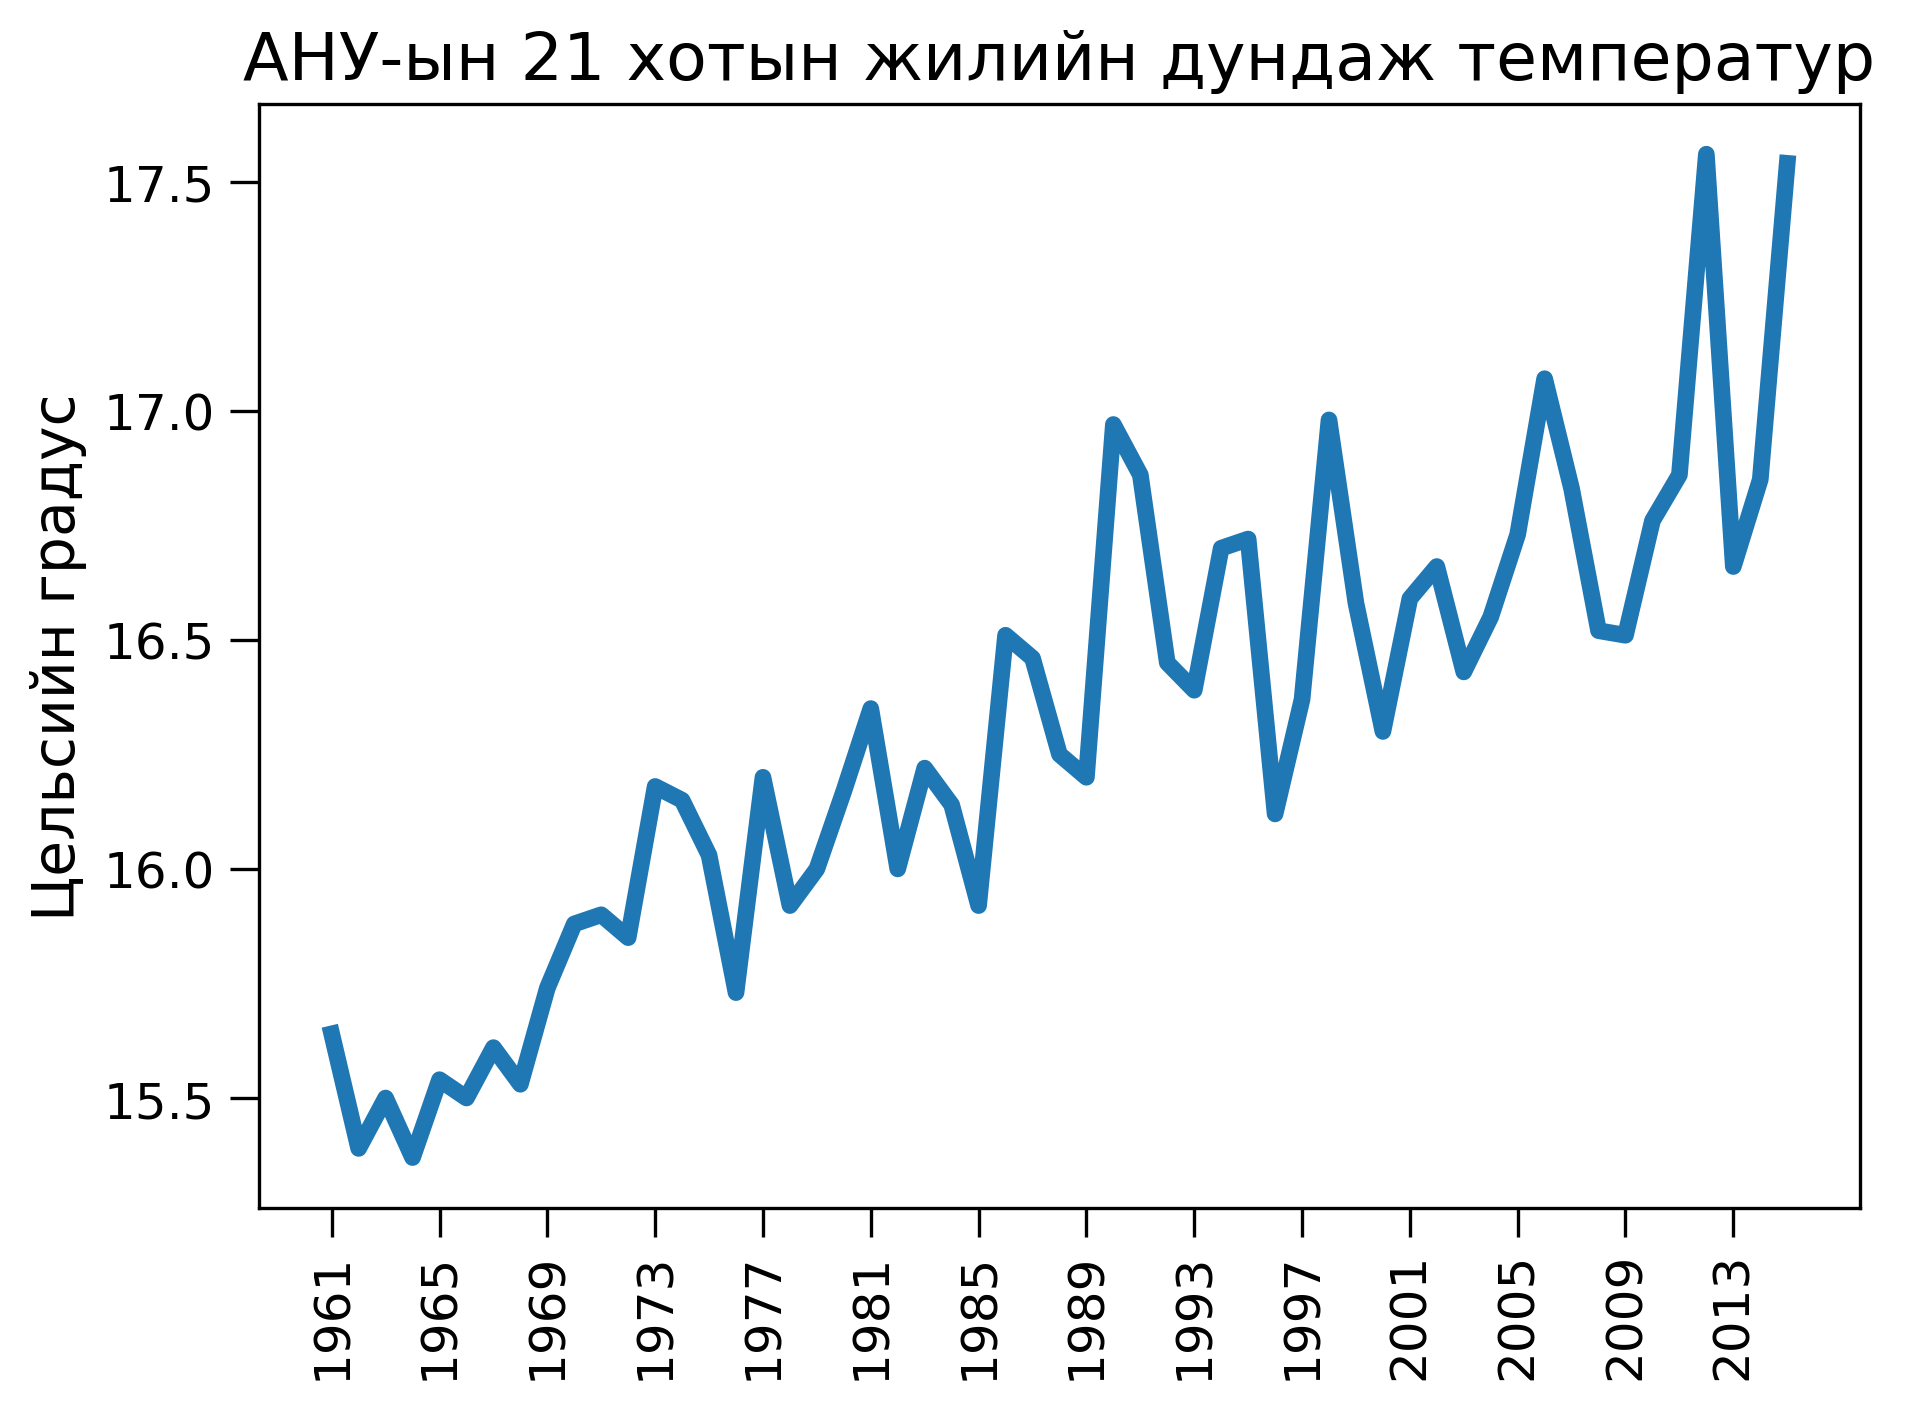

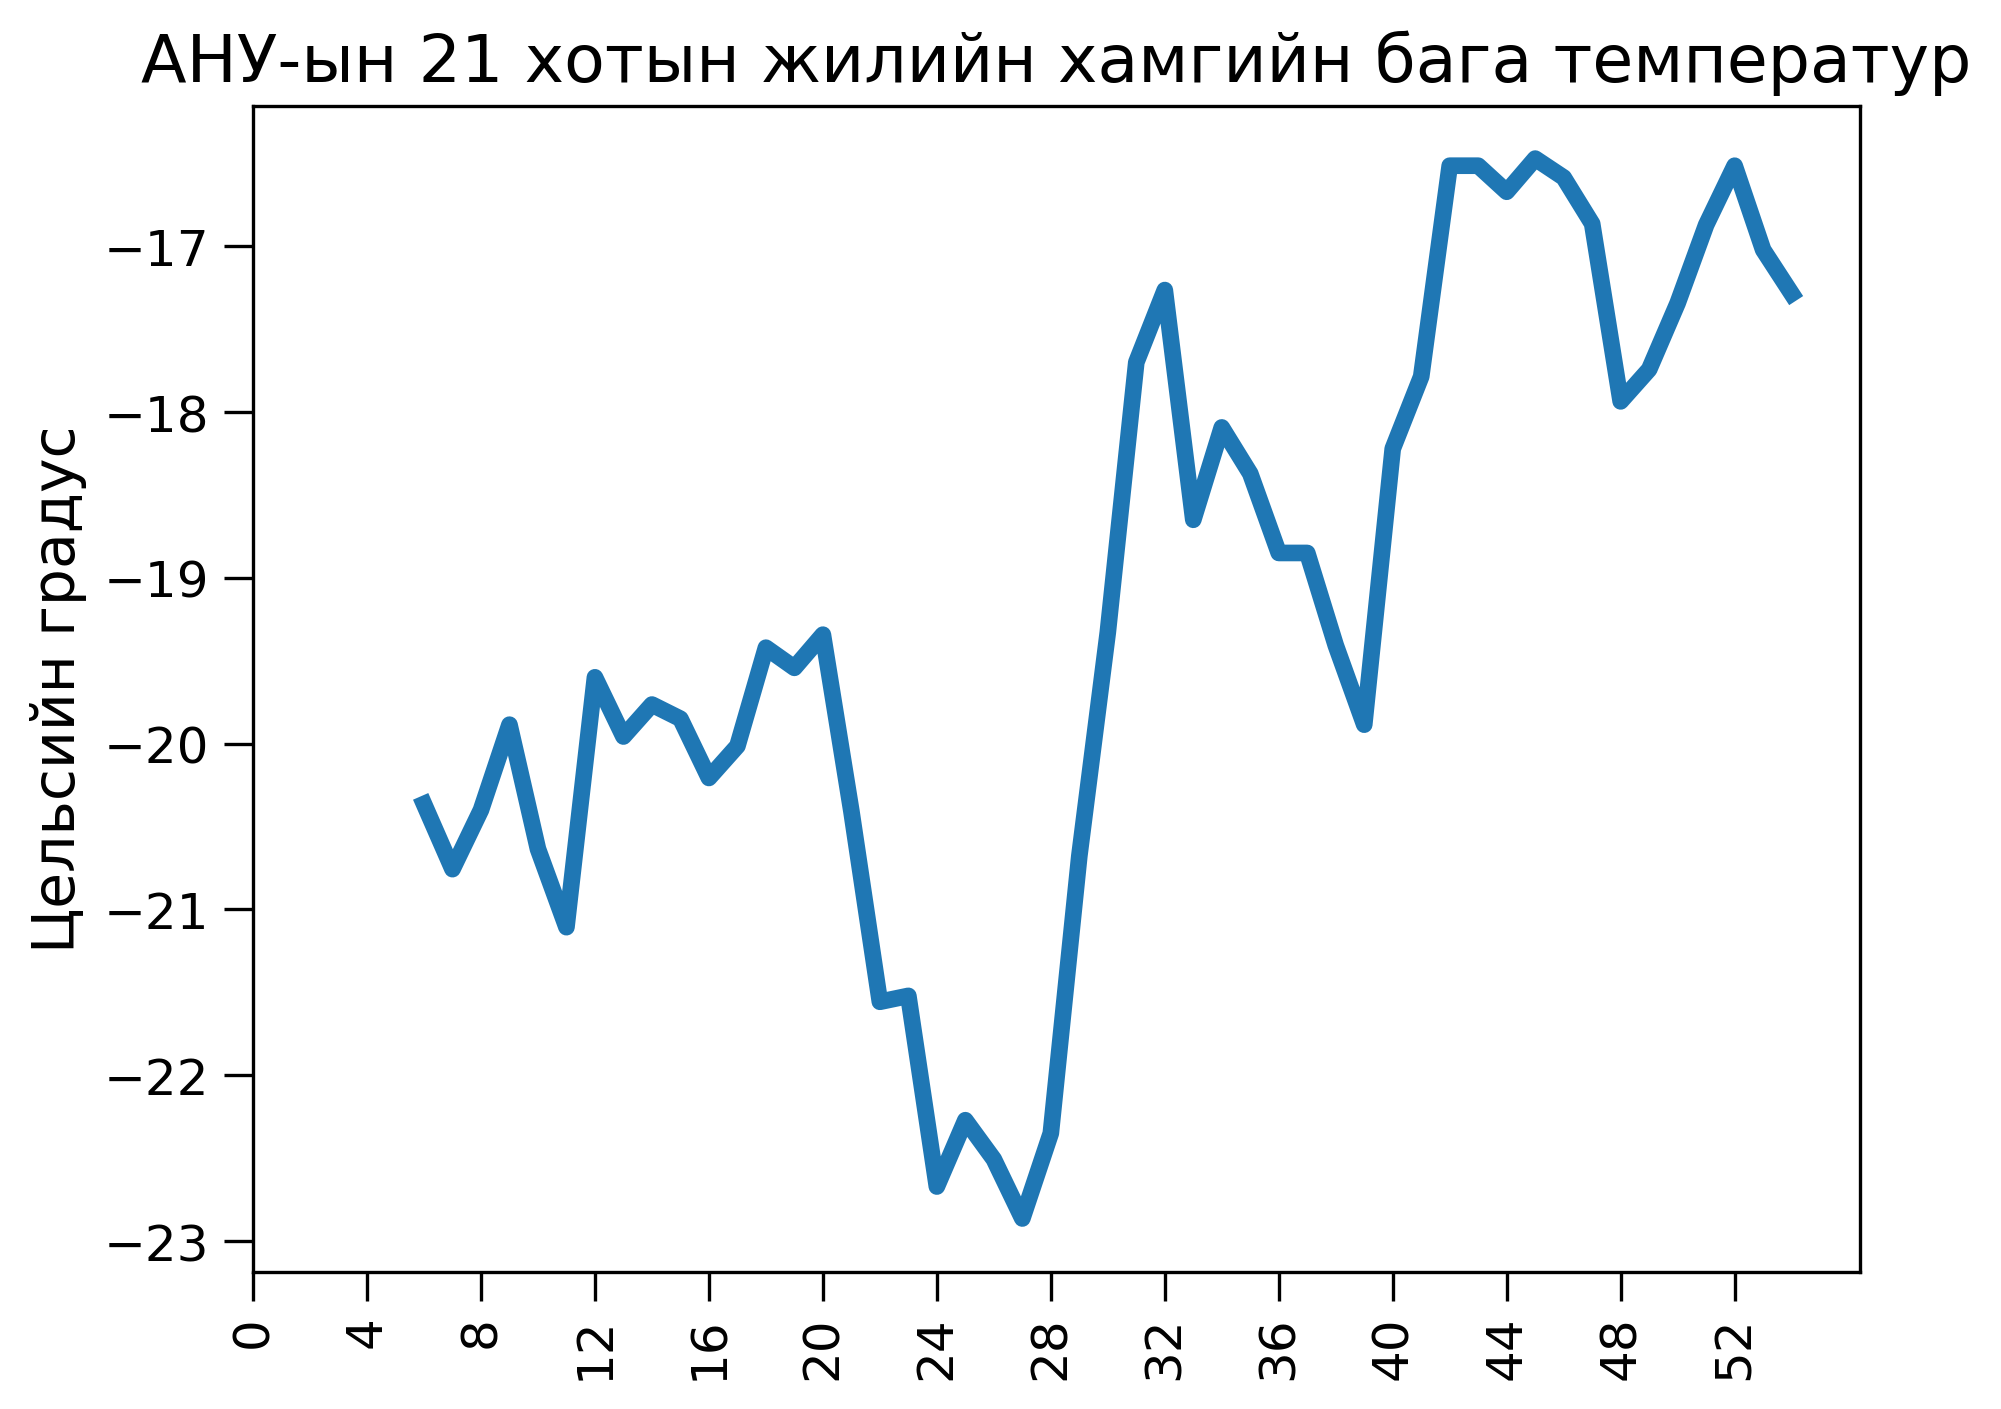

In [19]:
# Figure 23-5 modified as shown on page 537
plt.figure(0)
plt.plot(yearly_temps['Year'], yearly_temps['Mean T'])
plt.title('АНУ-ын 21 хотын жилийн дундаж температур')
plt.figure(1)
plt.plot(yearly_temps['Min T'].rolling(7).mean())
plt.title('АНУ-ын 21 хотын жилийн хамгийн бага температур')
for i in range(2):
    plt.figure(i)
    plt.xticks(range(0, len(yearly_temps), 4),
                rotation = 'vertical', size = 'large')
    plt.ylabel('Цельсийн градус')
    plt.tight_layout()
    plt.savefig(f'figure23-7-{i+1}.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [20]:
# Code from page 539
temperatures = pd.read_csv('US_temperatures.csv')
temperatures.drop('Date', axis = 'columns', inplace = True)
means = round(temperatures.mean(), 2)
maxes = temperatures.max()
mins = temperatures.min()
city_temps = pd.DataFrame({'Min T':mins, 'Max T':maxes,
'Mean T':means})
city_temps = city_temps.apply(lambda x: 1.8*x + 32)
city_temps['Max-Min'] = city_temps['Max T'] - city_temps['Min T']
print(city_temps.sort_values('Mean T', ascending = False).to_string())

               Min T   Max T  Mean T  Max-Min
San Juan       68.99   88.97  80.492    19.98
Miami          37.94   90.05  76.604    52.11
Phoenix        32.45  106.52  73.904    74.07
Tampa          28.94   89.06  72.878    60.12
New Orleans    18.95   90.95  68.882    72.00
Las Vegas      19.49  105.98  67.964    86.49
Dallas          8.51   97.52  66.092    89.01
San Diego      43.07   92.03  64.130    48.96
Los Angeles    42.98   94.01  63.158    51.03
Charlotte       9.50   90.50  60.512    81.00
San Francisco  30.56   86.00  57.632    55.44
Albuquerque    -3.46   89.96  57.110    93.42
St Louis       -8.50   96.98  56.408   105.48
Baltimore      -0.04   93.47  55.562    93.51
Philadelphia    0.50   92.48  55.364    91.98
New York        3.56   91.04  54.194    87.48
Portland       11.03   89.96  54.068    78.93
Seattle        12.02   86.99  52.376    74.97
Boston          1.04   92.48  51.620    91.44
Chicago       -18.04   92.48  49.622   110.52
Detroit       -12.01   89.51  49.5

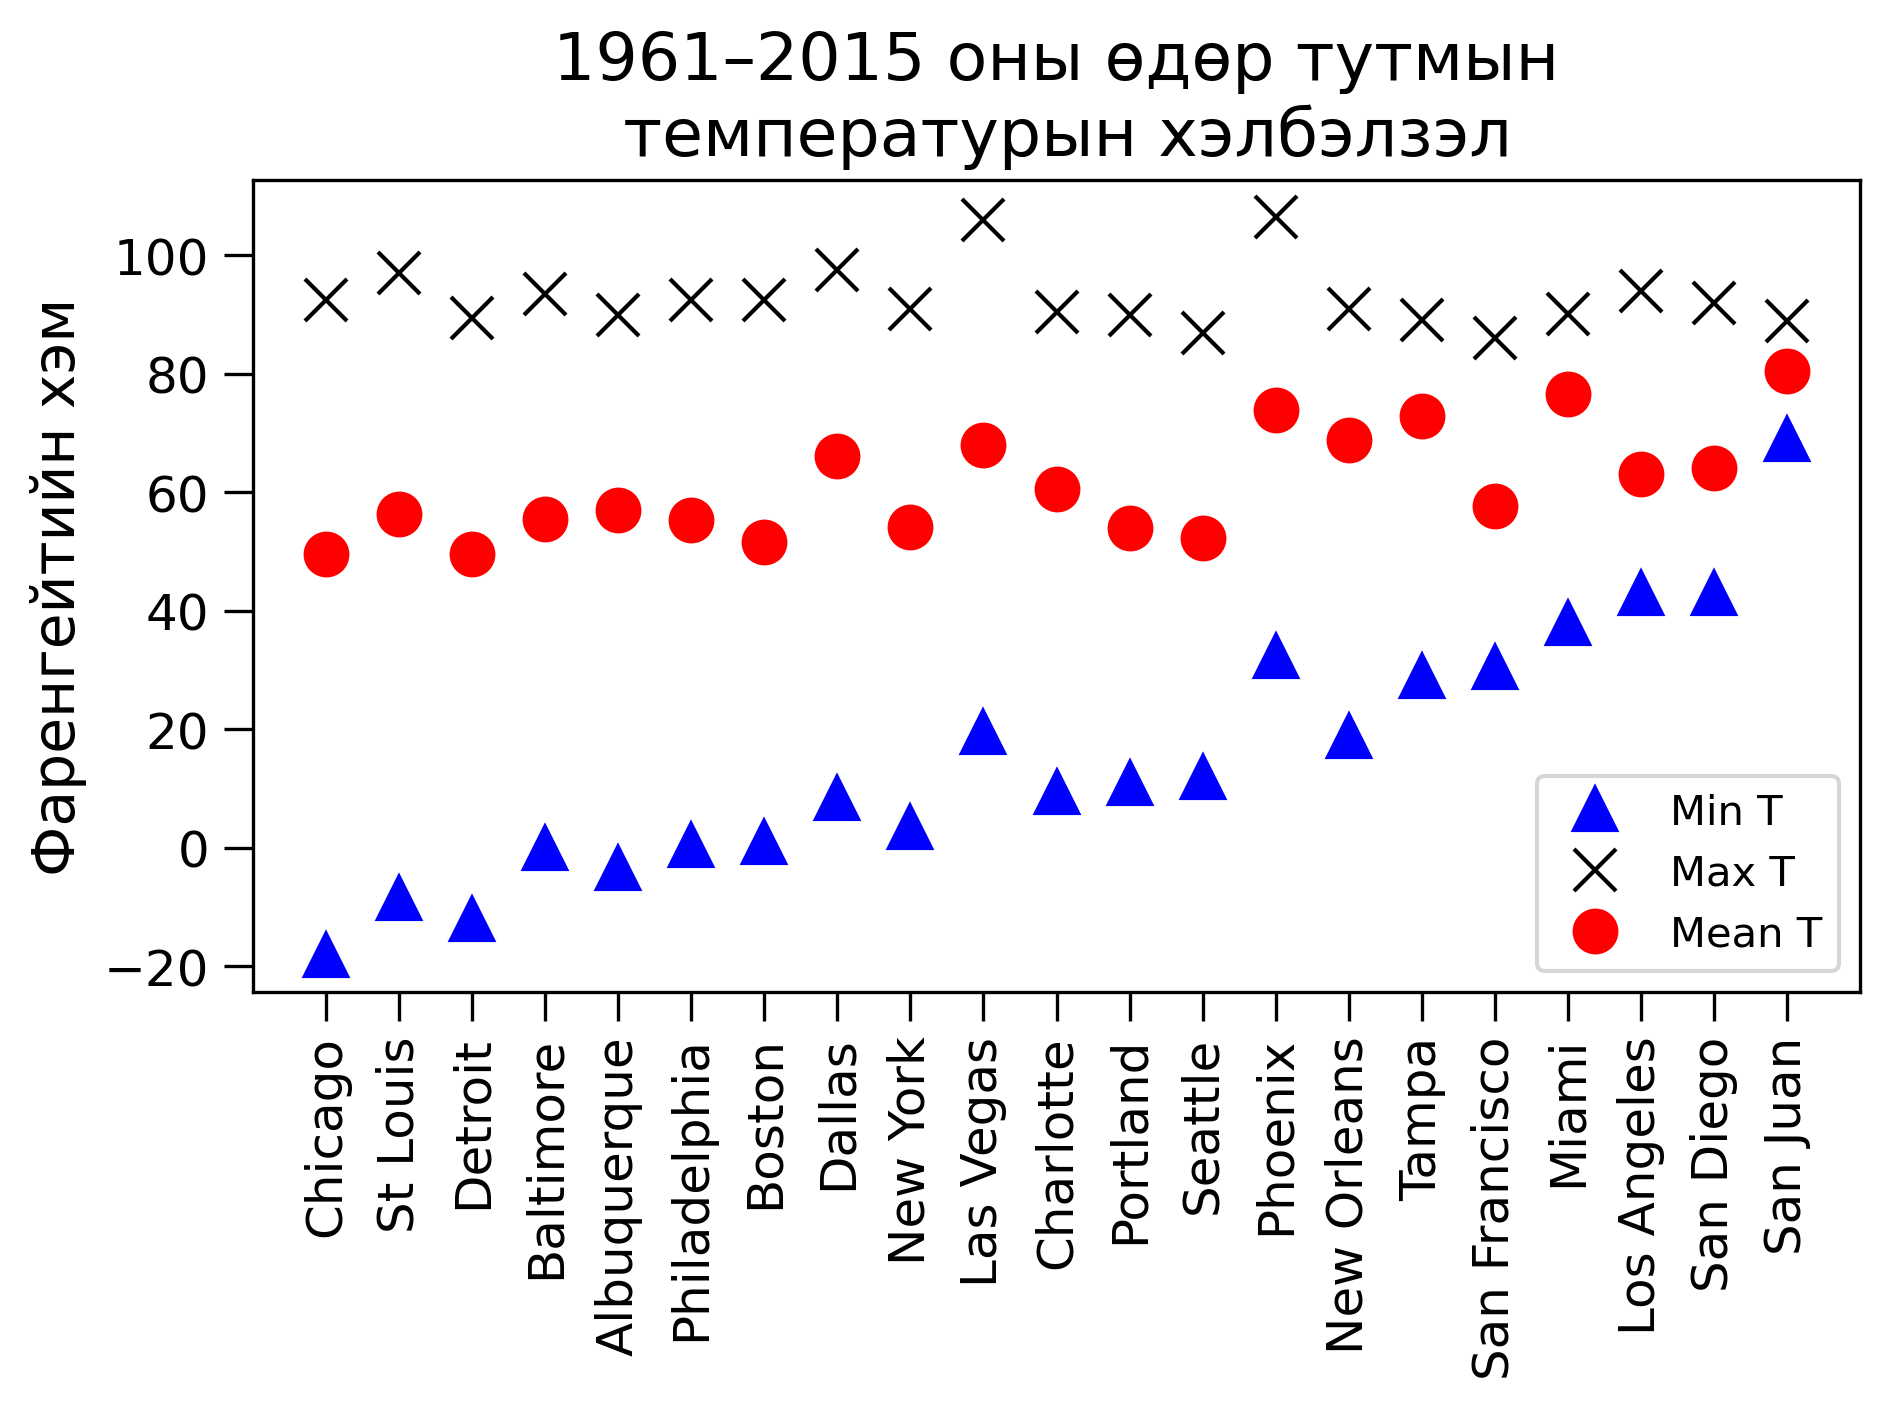

In [23]:
# Code from page 540
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Min T'],
          'b^', label = 'Min T')
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Max T'],
          'kx', label = 'Max T')
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Mean T'],
          'ro', label = 'Mean T')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.title('1961–2015 оны өдөр тутмын\n температурын хэлбэлзэл')
plt.ylabel('Фаренгейтийн хэм')
plt.tight_layout()
plt.savefig('figure23-9.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [24]:
# Code from page 541
emissions = pd.read_csv('global-fossil-fuel-consumption.csv')
print(emissions)

    Year         Coal    Crude Oil   Natural Gas
0   1965  16151.96017  18054.69004   6306.370076
1   1966  16332.01679  19442.23715   6871.686791
2   1967  16071.18119  20830.13575   7377.525476
..   ...          ...          ...           ...
50  2015  43786.84580  52053.27008  34741.883490
51  2016  43101.23216  53001.86598  35741.829870
52  2017  43397.13549  53752.27638  36703.965870

[53 rows x 4 columns]


In [25]:
# Code from page 542
emissions['Fuels'] = emissions.sum(axis = 'columns')
emissions.drop(['Coal', 'Crude Oil', 'Natural Gas'], axis = 'columns',
inplace = True)
num_years = 5
emissions['Roll F'] =\
emissions['Fuels'].rolling(num_years).mean()
emissions = emissions.round()

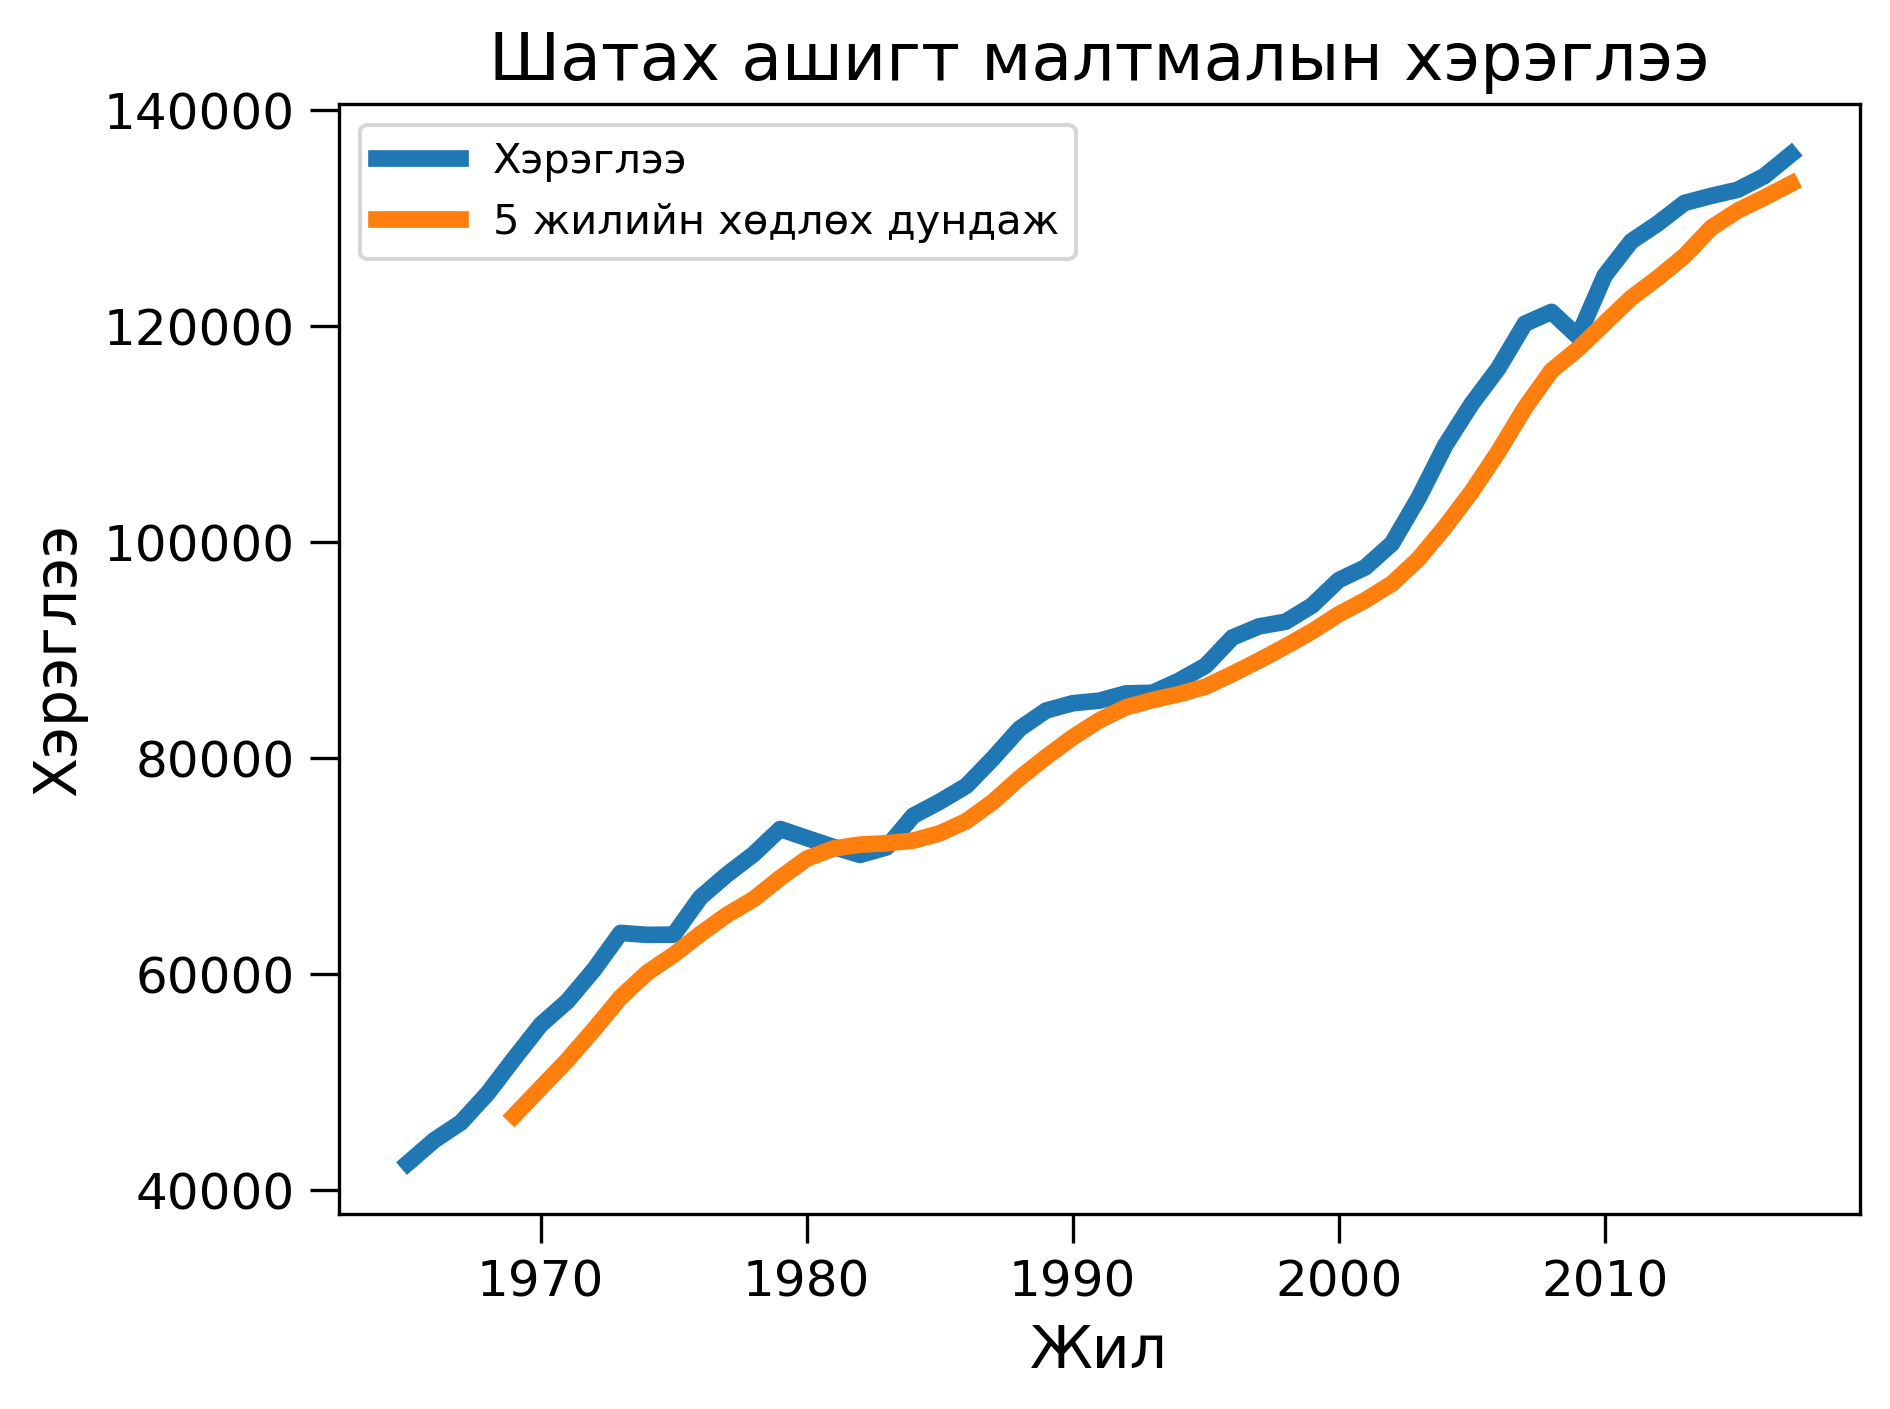

In [30]:
plt.plot(emissions['Year'], emissions['Fuels'],
          label = 'Хэрэглээ')
plt.plot(emissions['Year'], emissions['Roll F'],
label = str(num_years) + ' жилийн хөдлөх дундаж')
plt.legend()
plt.title('Шатах ашигт малтмалын хэрэглээ')
plt.xlabel('Жил')
plt.ylabel('Хэрэглээ')
plt.tight_layout()
plt.savefig('figure23-10.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)